<a href="https://colab.research.google.com/github/NancyYiWang/Spatial_Database_Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Data Preparation

In [2]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# hourly data of nine stations around Calgary from year 2016-2024 has been divided into 71 .csv files

folder_path = '/content/drive/My Drive/Data Mining Group Project/Weather Data/hourly_9StationsAroundCalgary_2016_2024/climate hourly'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# check if all the files have the same format

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path, nrows=1)
        print(f"\nFile: {file}")
        print(f"\nColumns: {list(df.columns)}")
    except Exception as e:
        print(f"\n Error reading {file}: {e}")


File: climate-hourly (0).csv

Columns: ['x', 'y', 'TEMP', 'TEMP_FLAG', 'HUMIDEX_FLAG', 'PRECIP_AMOUNT_FLAG', 'RELATIVE_HUMIDITY', 'DEW_POINT_TEMP_FLAG', 'HUMIDEX', 'VISIBILITY_FLAG', 'UTC_MONTH', 'STATION_PRESSURE_FLAG', 'LOCAL_HOUR', 'LOCAL_MONTH', 'STATION_PRESSURE', 'UTC_YEAR', 'WINDCHILL', 'PRECIP_AMOUNT', 'STATION_NAME', 'UTC_DAY', 'DEW_POINT_TEMP', 'WIND_SPEED', 'LOCAL_DATE', 'WIND_SPEED_FLAG', 'ID', 'LOCAL_DAY', 'LOCAL_YEAR', 'RELATIVE_HUMIDITY_FLAG', 'UTC_DATE', 'WEATHER_FRE_DESC', 'WEATHER_ENG_DESC', 'VISIBILITY', 'WINDCHILL_FLAG', 'PROVINCE_CODE', 'WIND_DIRECTION_FLAG', 'CLIMATE_IDENTIFIER', 'WIND_DIRECTION']

File: climate-hourly (1).csv

Columns: ['x', 'y', 'LOCAL_DAY', 'UTC_DAY', 'WEATHER_FRE_DESC', 'WIND_SPEED_FLAG', 'UTC_YEAR', 'DEW_POINT_TEMP_FLAG', 'HUMIDEX', 'VISIBILITY', 'STATION_NAME', 'PRECIP_AMOUNT_FLAG', 'ID', 'RELATIVE_HUMIDITY_FLAG', 'LOCAL_HOUR', 'CLIMATE_IDENTIFIER', 'TEMP_FLAG', 'HUMIDEX_FLAG', 'PROVINCE_CODE', 'STATION_PRESSURE_FLAG', 'WINDCHILL_FLAG', 'UT

In [5]:
# the format is not the same from appearance
# build a table to see more clearly

file_columns_dict = {}
all_columns = set()

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path, nrows=1)
        cols = set(df.columns)
        file_columns_dict[file] = cols
        all_columns.update(cols)
    except Exception as e:
        print(f"Error reading {file}: {e}")

presence_data = []
for file in csv_files:
    presence_row = {col: (1 if col in file_columns_dict[file] else 0) for col in all_columns}
    presence_row["filename"] = file
    presence_data.append(presence_row)

presence_df = pd.DataFrame(presence_data)
presence_df = presence_df.set_index("filename")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

display(presence_df)

,LOCAL_YEAR,WINDCHILL_FLAG,WEATHER_ENG_DESC,LOCAL_DAY,y,RELATIVE_HUMIDITY_FLAG,WIND_SPEED,LOCAL_DATE,LOCAL_MONTH,CLIMATE_IDENTIFIER,x,RELATIVE_HUMIDITY,UTC_YEAR,PROVINCE_CODE,DEW_POINT_TEMP,VISIBILITY,HUMIDEX,STATION_NAME,UTC_DATE,WEATHER_FRE_DESC,TEMP,VISIBILITY_FLAG,HUMIDEX_FLAG,ID,STATION_PRESSURE,WINDCHILL,LOCAL_HOUR,UTC_DAY,TEMP_FLAG,PRECIP_AMOUNT,STATION_PRESSURE_FLAG,PRECIP_AMOUNT_FLAG,WIND_DIRECTION,WIND_DIRECTION_FLAG,DEW_POINT_TEMP_FLAG,WIND_SPEED_FLAG,UTC_MONTH
filename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
climate-hourly (0).csv,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
climate-hourly (1).csv,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
climate-hourly (2).csv,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
climate-hourly (3).csv,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
climate-hourly (4).csv,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
climate-hourly (5).csv,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
climate-hourly (6).csv,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
climate-hourly (7).csv,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
climate-hourly (8).csv,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [6]:
# seems like there are no zeros in the table, let's check it out

missing_positions = (presence_df == 0)

for file, row in missing_positions.iterrows():
    for col, is_missing in row.items():
        if is_missing:
            print(f"Missing column: '{col}' in file: {file}")
else:
    print("All the files have the same attribute set!")

All the files have the same attribute set!


In [7]:
# good! now let's select out the attributes we will need to use in the model, and merge the files only on these attributes

selected_attributes = ["STATION_NAME", "x", "y", "LOCAL_DATE", "TEMP", "PRECIP_AMOUNT", "RELATIVE_HUMIDITY", "WIND_SPEED", "DEW_POINT_TEMP"]

merged_data = []

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path)
        filtered_df = df[selected_attributes].copy()
        merged_data.append(filtered_df)
        print(f"Loaded: {file}")
    except Exception as e:
        print(f"Failed to read {file}: {e}")

final_df = pd.concat(merged_data, ignore_index=True)

print(f"\nMerged dataset shape: {final_df.shape}")
display(final_df.head())

Loaded: climate-hourly (0).csv
Loaded: climate-hourly (1).csv
Loaded: climate-hourly (2).csv
Loaded: climate-hourly (3).csv
Loaded: climate-hourly (4).csv
Loaded: climate-hourly (5).csv
Loaded: climate-hourly (6).csv
Loaded: climate-hourly (7).csv
Loaded: climate-hourly (8).csv
Loaded: climate-hourly (9).csv
Loaded: climate-hourly (10).csv
Loaded: climate-hourly (11).csv
Loaded: climate-hourly (12).csv
Loaded: climate-hourly (13).csv
Loaded: climate-hourly (14).csv
Loaded: climate-hourly (15).csv
Loaded: climate-hourly (16).csv
Loaded: climate-hourly (17).csv
Loaded: climate-hourly (18).csv
Loaded: climate-hourly (19).csv
Loaded: climate-hourly (20).csv
Loaded: climate-hourly (21).csv
Loaded: climate-hourly (22).csv
Loaded: climate-hourly (23).csv
Loaded: climate-hourly (24).csv
Loaded: climate-hourly (25).csv
Loaded: climate-hourly (26).csv
Loaded: climate-hourly (27).csv
Loaded: climate-hourly (28).csv
Loaded: climate-hourly (29).csv
Loaded: climate-hourly (30).csv
Loaded: climate-ho

,STATION_NAME,x,y,LOCAL_DATE,TEMP,PRECIP_AMOUNT,RELATIVE_HUMIDITY,WIND_SPEED,DEW_POINT_TEMP
0,DRUMHELLER EAST,-112.676667,51.445278,2016-01-01 00:00:00,-22.3,NaN,83.0,0.0,-24.5
1,DRUMHELLER EAST,-112.676667,51.445278,2016-01-01 01:00:00,-23.2,NaN,81.0,0.0,-25.5
2,DRUMHELLER EAST,-112.676667,51.445278,2016-01-01 02:00:00,-23.0,NaN,83.0,0.0,-25.2
3,DRUMHELLER EAST,-112.676667,51.445278,2016-01-01 03:00:00,-24.0,NaN,80.0,0.0,-26.4
4,DRUMHELLER EAST,-112.676667,51.445278,2016-01-01 04:00:00,-23.6,NaN,81.0,0.0,-25.9


In [8]:
# remove potential duplicate rows and delete all rows containing any NULL values.

final_df = final_df.drop_duplicates()
final_df = final_df.dropna()

print(f"Cleaned DataFrame shape: {final_df.shape}")
display(final_df.head())

Cleaned DataFrame shape: (554180, 9)


,STATION_NAME,x,y,LOCAL_DATE,TEMP,PRECIP_AMOUNT,RELATIVE_HUMIDITY,WIND_SPEED,DEW_POINT_TEMP
324,DRUMHELLER EAST,-112.676667,51.445278,2016-01-14 12:00:00,0.6,0.0,82.0,8.0,-2.2
325,DRUMHELLER EAST,-112.676667,51.445278,2016-01-14 13:00:00,1.2,0.0,77.0,9.0,-2.5
326,DRUMHELLER EAST,-112.676667,51.445278,2016-01-14 14:00:00,0.9,0.0,73.0,12.0,-3.3
508,DRUMHELLER EAST,-112.676667,51.445278,2016-01-22 04:00:00,4.8,0.0,71.0,7.0,-0.1
509,DRUMHELLER EAST,-112.676667,51.445278,2016-01-22 05:00:00,3.6,0.0,75.0,6.0,-0.4


In [9]:
# generate geom

final_df["geometry"] = final_df.apply(lambda row: Point(row["x"], row["y"]), axis=1)

gdf = gpd.GeoDataFrame(final_df, geometry="geometry", crs="EPSG:4326")

print(gdf.shape)
display(gdf.head())

(554180, 10)


,STATION_NAME,x,y,LOCAL_DATE,TEMP,PRECIP_AMOUNT,RELATIVE_HUMIDITY,WIND_SPEED,DEW_POINT_TEMP,geometry
324,DRUMHELLER EAST,-112.676667,51.445278,2016-01-14 12:00:00,0.6,0.0,82.0,8.0,-2.2,POINT (-112.67667 51.44528)
325,DRUMHELLER EAST,-112.676667,51.445278,2016-01-14 13:00:00,1.2,0.0,77.0,9.0,-2.5,POINT (-112.67667 51.44528)
326,DRUMHELLER EAST,-112.676667,51.445278,2016-01-14 14:00:00,0.9,0.0,73.0,12.0,-3.3,POINT (-112.67667 51.44528)
508,DRUMHELLER EAST,-112.676667,51.445278,2016-01-22 04:00:00,4.8,0.0,71.0,7.0,-0.1,POINT (-112.67667 51.44528)
509,DRUMHELLER EAST,-112.676667,51.445278,2016-01-22 05:00:00,3.6,0.0,75.0,6.0,-0.4,POINT (-112.67667 51.44528)


In [10]:
# save gdf into a .csv file

gdf.to_csv("/content/drive/My Drive/Data Mining Group Project/Weather Data/hourly_9StationsAroundCalgary_2016_2024/final_weather_with_geom.csv", index=False)

Since we need hourly data to predict the formation of black ice, but inside the city of Calgary, we don't have data source that provide hourly climate data, then it came to us that we can use data from climate stations around Calgary as the base and use interpolationalgrothoms like Kriging to estimate the climate data of each grid of the city of Calgary. In that case, we can use the estimated data as a more accurate weather data compairing to the daily data.

In [11]:
# let's try Kriging first

!pip install pykrige

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.6/979.6 kB 21.4 MB/s eta 0:00:00


In [12]:
# let's target 2024-02-26 00:00:00
# which is a day that snowed slightly around the station of SUNDRE A but not snowing in the other 7 areas

from pykrige.ok import OrdinaryKriging
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box, Polygon
import folium
from folium.plugins import HeatMap
import branca.colormap as cm

gdf["LOCAL_DATE"] = pd.to_datetime(gdf["LOCAL_DATE"], errors="coerce")
target_time = pd.to_datetime("2024-02-26 00:00:00")
gdf_filtered = gdf[gdf["LOCAL_DATE"] == target_time].copy()

print(gdf_filtered.shape)
print(gdf_filtered)

(8, 10)
            STATION_NAME           x          y LOCAL_DATE  TEMP  PRECIP_AMOUNT  \
70456    DRUMHELLER EAST -112.676667  51.445278 2024-02-26  -2.7            0.0   
148004          SUNDRE A -114.682500  51.778056 2024-02-26  -4.8            0.7   
225257            BROOKS -111.848897  50.555297 2024-02-26  -4.4            0.0   
382661  CALGARY INT'L CS -114.000297  51.109447 2024-02-26  -4.3            0.0   
461460        CLARESHOLM -113.638636  50.003631 2024-02-26   3.7            0.0   
538901   STRATHMORE AGDM -113.283333  51.033333 2024-02-26  -4.6            0.0   
617196          BANFF CS -115.552236  51.193358 2024-02-26  -2.9            0.0   
695419        BOW VALLEY -115.066667  51.083333 2024-02-26  -2.1            0.0   

        RELATIVE_HUMIDITY  WIND_SPEED  DEW_POINT_TEMP                     geometry  
70456                92.0        18.0            -3.9  POINT (-112.67667 51.44528)  
148004               94.0        14.0            -5.6   POINT (-114.6825 5

z_interp shape: (12, 13)


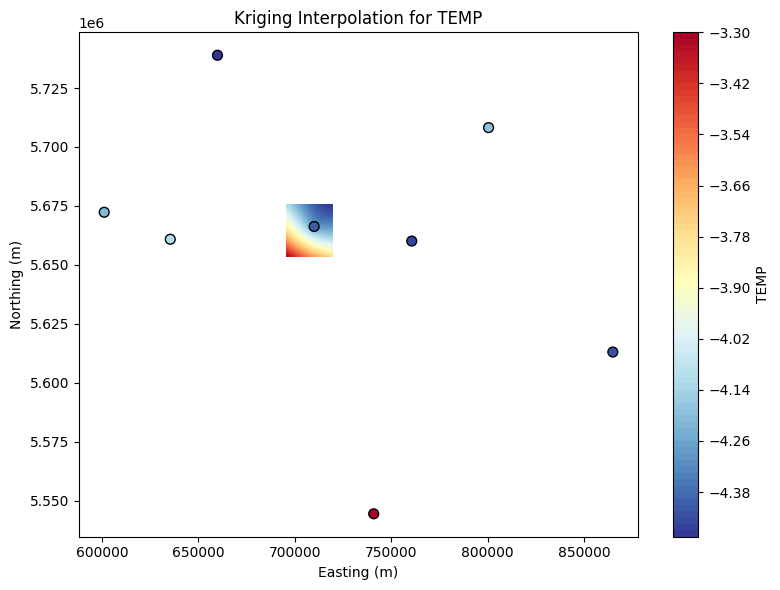

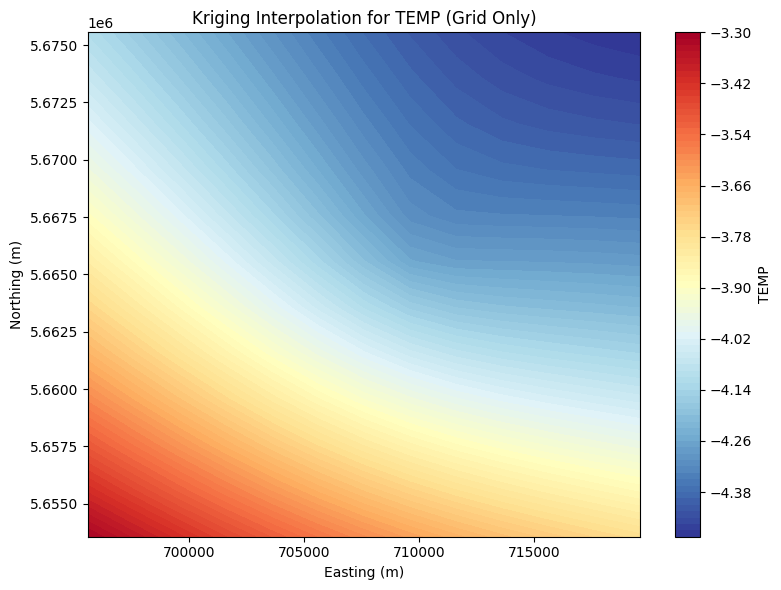

In [13]:
# take take the TEMP paremeter as a trail

import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box, Point
from pykrige.ok import OrdinaryKriging
import pandas as pd

gdf_utm = gdf_filtered.to_crs(epsg=32611)

calgary_rect_wgs84 = box(-114.20, 51.00, -113.85, 51.20)
city_boundary = gpd.GeoDataFrame(geometry=[calgary_rect_wgs84], crs="EPSG:4326")
city_boundary = city_boundary.to_crs(epsg=32611)

xmin, ymin, xmax, ymax = city_boundary.total_bounds
grid_spacing = 2000
grid_x = np.arange(xmin, xmax, grid_spacing)
grid_y = np.arange(ymin, ymax, grid_spacing)
grid_xx, grid_yy = np.meshgrid(grid_x, grid_y)

var = "TEMP"
data = gdf_utm[[var, "geometry"]].copy()
x = data.geometry.x.values
y = data.geometry.y.values
z = data[var].values

if np.all(z == z[0]):
    raise ValueError(f"All {var} values are identical: {z[0]}")

OK = OrdinaryKriging(
    x, y, z,
    variogram_model="spherical",
    verbose=False,
    enable_plotting=False,
)

z_interp, ss = OK.execute("grid", grid_x, grid_y)
print(f"z_interp shape: {z_interp.shape}")

plt.figure(figsize=(8, 6))

contour = plt.contourf(grid_xx, grid_yy, z_interp, cmap="RdYlBu_r", levels=100)

plt.scatter(x, y, c=z, edgecolor="k", cmap="RdYlBu_r", s=50)
plt.colorbar(contour, label=f"{var}")
plt.title(f"Kriging Interpolation for {var}")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))

contour = plt.contourf(grid_xx, grid_yy, z_interp, cmap="RdYlBu_r", levels=100)
plt.colorbar(contour, label=f"{var}")
plt.title(f"Kriging Interpolation for {var} (Grid Only)")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.tight_layout()
plt.show()
